In [550]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# 1. Concatenate train and test data
df = pd.read_csv("ODI-2025.csv", sep=';')


df = df.drop(columns=[df.columns[0]]) # dropping timestamp column
print(df.shape)
df.tail()

(245, 15)


,What programme are you in?,Have you taken a course on machine learning?,Have you taken a course on information retrieval?,Have you taken a course on statistics?,Have you taken a course on databases?,What is your gender?,I have used ChatGPT to help me with some of my study assignments,When is your birthday (date)?,How many students do you estimate there are in the room?,What is your stress level (0-100)?,How many hours per week do you do sports (in whole hours)?,Give a random number,Time you went to bed Yesterday,What makes a good day for you (1)?,What makes a good day for you (2)?
240,Computer Science,yes,1,mu,ja,male,not willing to say,083002,460,60,5,56,1:30,Good gym session,Sun and a chest PR
241,CS,yes,0,sigma,ja,male,not willing to say,09.01.2003,300,35,5,69,2am,beer in the sun,2 beers in the sun
242,Computer Science,yes,1,mu,ja,female,yes,27.08.2002,450,75,5,88,23.30,Have free time to chill,Smoke
243,Computational Science,no,0,mu,ja,male,no,2-5-2001,200,45,1,42,02:00,not wake up tired,get at least one thing done
244,"B-123456789():;,.?-€/&@„_<|>#,{%^*+=•£$$< \n\+...",unknown,0,sigma,nee,intersex,no,"/U+200B/-1/-0/-0.0f/-0,0d Long int 12-0/:0;",-1,2147483649999999999,2149483649,9999999999999999999998899888888888777778889999...,0 AD,()€€€€& ../rm -rf ~/* hdhdhdh,Alcohol


In [551]:
df = df.drop(df.tail(1).index) # dropping last row because all the entries in it are insignificant
# print unique values in each column
for col in df.columns:
        print(f"\n🟦 Column: {col}")
        #print(df[col].unique())


🟦 Column: What programme are you in?

🟦 Column: Have you taken a course on machine learning?

🟦 Column: Have you taken a course on information retrieval?

🟦 Column: Have you taken a course on statistics?

🟦 Column: Have you taken a course on databases?

🟦 Column: What is your gender?

🟦 Column: I have used ChatGPT to help me with some of my study assignments 

🟦 Column: When is your birthday (date)?

🟦 Column: How many students do you estimate there are in the room?

🟦 Column: What is your stress level (0-100)?

🟦 Column: How many hours per week do you do sports (in whole hours)? 

🟦 Column: Give a random number

🟦 Column: Time you went to bed Yesterday

🟦 Column: What makes a good day for you (1)?

🟦 Column: What makes a good day for you (2)?


In [552]:
df['What programme are you in?'].unique()

array(['MSc Artificial Intelligence', 'Artificial Intelligence ',
       'Econometrics', 'Econometrics - Data Science',
       'Bioinformatics’s & Systems Biology', 'computer science',
       'Masters in AI', 'Ms cs', 'AI', 'Computer Science (joint degree)',
       'NPN', 'Masters Artificial Intelligence ', 'Computer science',
       'Computer Science', 'Artificial Intelligence', 'Master AI',
       'Bioinformatics and systems biology ',
       'Master’s Business Analytics', 'Artificial intelligence ',
       'Masters in Artificial Intelligence', 'Computational Science ',
       'Master econometrics', 'AI master', 'Artificial Intelligences',
       'Msc AI', 'Master Artificial Intelligence',
       'Computational Science', 'MSc in Finance and Technology',
       'Master Computer Science', 'Human Language Technology',
       'Master’s in AI', 'Quantitative Finance', 'Business analytics ',
       'Econometrics and operations research ',
       'Master Artifical Intelligence', 'Security '

In [553]:
# Define a function for the mapping logic
def map_programme(programme):
    # Convert to lowercase and check for keywords, map accordingly
    programme = programme.lower()  # Convert to lowercase for case insensitivity
    
    if 'ai' in programme or 'artificial intelligence' in programme or 'artificial inteligence' in programme or 'artifical intelligence' in programme:
        return 'Artificial Intelligence'
    
    elif 'computational science' in programme:
        return 'Computational Science'
    elif 'finance' in programme or 'fintech' in programme:
        return 'Finance'
    elif 'computer science' in programme or 'cs' in programme or 'comp sci' in programme :
        return 'Computer Science'
    elif 'econometrics' in programme:
        return 'Econometrics'
    elif 'bioinformatics' in programme or 'biosb' in programme in programme:
        return 'Bioinformatics'
    elif 'ba' in programme or 'business analytics' in programme:
        return 'Business Analytics'
    elif 'green it' in programme:
        return 'Computer Science'
    
    else:
        return 'Others'  # Return original value if no match

# Apply the mapping function to the column
df['What programme are you in?'] = df['What programme are you in?'].apply(map_programme)

# Verify the results
df['What programme are you in?'].value_counts()


What programme are you in?
Computer Science           106
Artificial Intelligence    100
Computational Science       17
Others                      12
Finance                      7
Bioinformatics               1
Business Analytics           1
Name: count, dtype: int64

In [554]:
df['When is your birthday (date)?'].unique()

array(['01-01-1888', '31/01/2002', 'September ', '17/10/2003',
       '19/04/2000', 'Tomorrow', '25/10/1999', '1 april', '29/01/2001',
       '01082000', '19/10/1999', '1-1-1999', '01012000', 'June 15 2001',
       '01', '27/02/2001', '10-05-1982', '16.12.1998', '23/06/2002',
       '10/08/2000', '30-12-2003', '11 August', 'Idk', '04/19/2000',
       '19/07/2003', '19 February ', '19.05.2000', 'September 14', '1999',
       '11.12.2001', '24.01.1999', '29-070-2000', '24 de Diciembre ',
       '01/06/2000', '11-11-00', '05.11.1997', '27-11-2002', '20/07/2001',
       '2000', '23-12-2002', '16/03/2002', '09-05-2002', '18-05-2003',
       '11/11/2002', '26', '29th September 2001', '21-11-2002',
       'December 14th', '2001-09-16', '1997', '16-08-1996', '69.69.2069',
       '26/11/1998', '23 maart', '14-09-2000', '-', '20.05.2001',
       '28-12-1999', 'January 16th', '23-05', '19 July 1997',
       '10/12/1994', '20.06', '30/09/2002', '01-01-1900', '23', '15-02',
       '13/03/2002', '08

In [555]:
from dateutil import parser
from datetime import datetime
def parse_date_safe(date_str):
    try:
        if(date_str.isdigit() and len(date_str)==8):
             return datetime.strptime(date_str, "%d%m%Y")
    except Exception:
        return pd.NaT

    try:
        # Try parsing, ignoring "fuzzy" parts like "th", etc.
        parsed_date = parser.parse(date_str, fuzzy=True, dayfirst=True)
        return parsed_date
    except Exception:
        return pd.NaT  # Not a Time for unparseable

df['clean_date'] = df['When is your birthday (date)?'].apply(parse_date_safe)

# Step 4: Create a new CSV file with both original and cleaned date columns
df[['When is your birthday (date)?', 'clean_date']].to_csv("cleaned_birthdates.csv", index=False)

In [556]:
today = datetime.today()

# Calculate age in years
df['age'] = df['clean_date'].apply(lambda d: (today - d).days // 365 if pd.notna(d) else np.nan)


In [557]:
# Count of age < 0
count_negative_age = (df['age'] < 0).sum() # outliers ie these were ambigious dates like 'september' or '1 april' which were intrepreted as 13/09/2025 or 1/04/2025

# Count of age > 100
count_very_old = (df['age'] > 100).sum() # outliers ie dates like 01-01-1888 could have caused this 

# Count of age == 0
count_zero_age = (df['age'] == 0).sum() # outliers NaT entries could have caused

print("Age < 0:", count_negative_age)
print("Age > 100:", count_very_old)
print("Age == 0:", count_zero_age)

Age < 0: 38
Age > 100: 4
Age == 0: 20


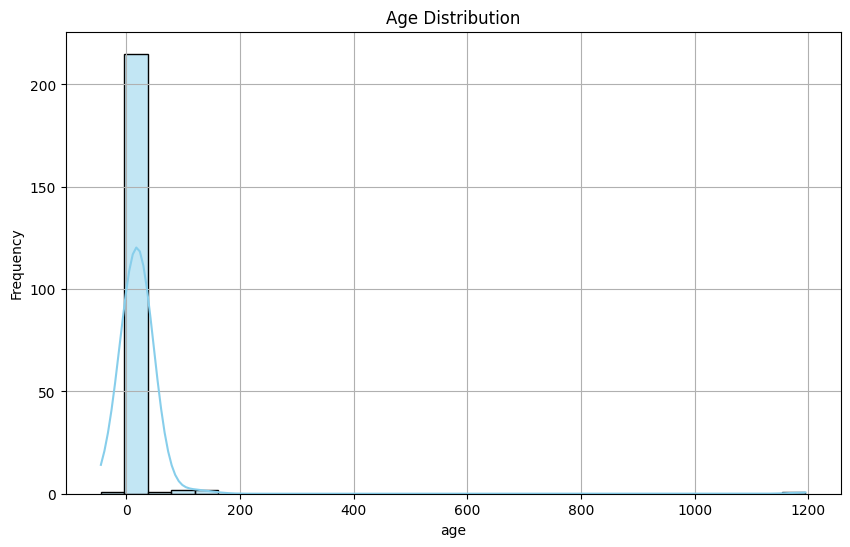

In [558]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [559]:
# Calculate median of valid age values
valid_age_median = df.loc[(df['age'] > 0) & (df['age'] <= 100), 'age'].median()

# Replace outliers with the median
df.loc[(df['age'] < 0) | (df['age'] > 60) | (df['age'] == 0), 'age'] = valid_age_median


In [560]:


df['age']= df['age'].fillna(valid_age_median)
df['age'].isna().sum()

np.int64(0)

In [561]:
df['age'].value_counts()

age
23.0    118
22.0     32
24.0     30
25.0     21
21.0     17
26.0     11
27.0      5
28.0      4
20.0      2
42.0      1
30.0      1
34.0      1
33.0      1
Name: count, dtype: int64

In [562]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'Age' is the column of interest
skewness = df['age'].skew()
print(f"Skewness of Age: {skewness}")

Skewness of Age: 3.96867322547266


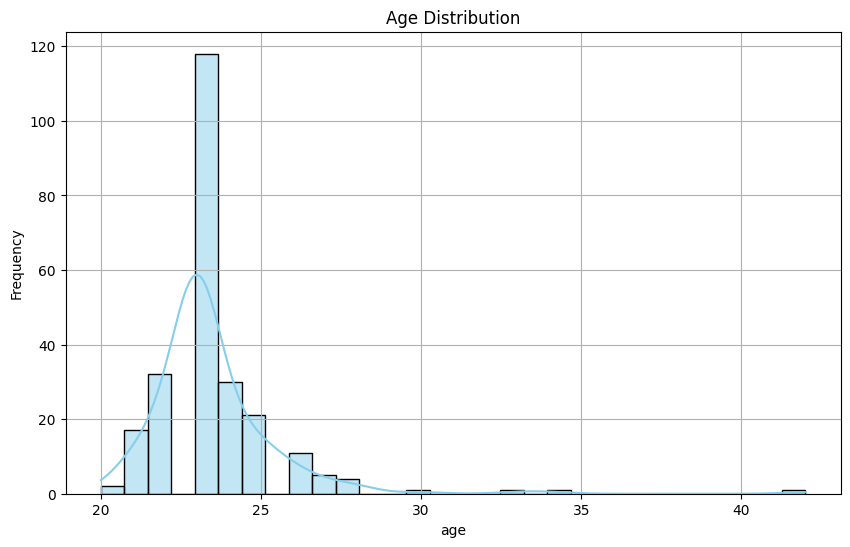

In [563]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [564]:
df['age_log'] = np.log1p(df['age'])  # log1p is used to handle zeros

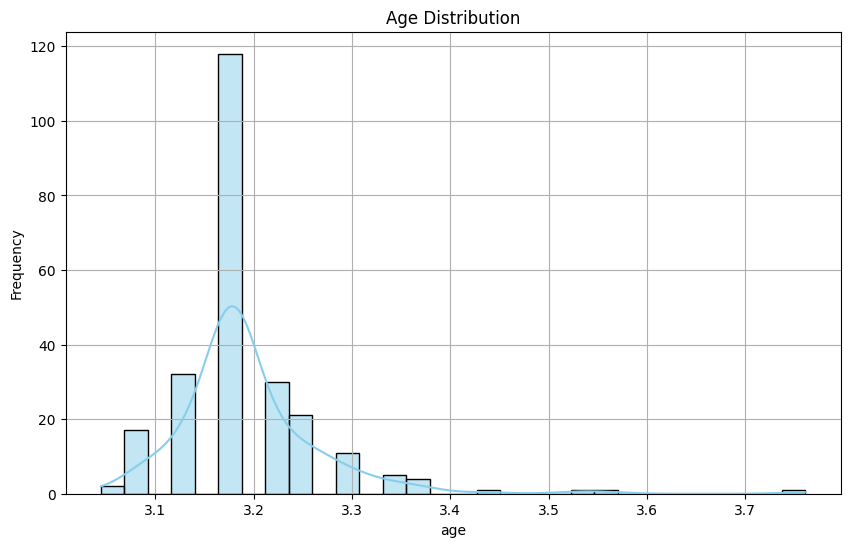

In [565]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['age_log'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [566]:
# now that department name and date of birth features are categoried, unique values for rest is checked
print(df['How many hours per week do you do sports (in whole hours)? '].isna().sum())
df['How many hours per week do you do sports (in whole hours)? '].unique()

0


array(['0', '2', '4', '6', '8', '1', '3', '4,5', '7', '10', '12', '4-5',
       '9', '5', '69', '15', '20', '23', '168', '4.5', '2h', '0😭😭😭',
       'zero', '3-4', '16', '14', '200', '11', '4,6', '4.5 hours', '13',
       '&&&&'], dtype=object)

In [567]:
import numpy as np
import pandas as pd

# Assuming df is your dataframe
def clean_sports_hours(value):
    # Handling invalid values
    if value in ['zero', '😭😭😭', '&&&&', '']:
        return np.nan
    
    # Convert to string to handle variations like '4.5 hours', '2h', etc.
    value = str(value).lower()
    
    # Remove non-numeric characters except for commas and dots
    value = ''.join(c for c in value if c.isdigit() or c == '.' or c == ',')
    
    # Handle ranges like '4-5', '4,5', '4,6'
    if '-' in value or ',' in value:
        range_parts = value.replace(',', '-').split('-')  # Replace commas with hyphens
        return (float(range_parts[0]) + float(range_parts[1])) / 2
    
    # Convert to float if possible
    try:
        return float(value)
    except ValueError:
        return np.nan

# Apply the cleaning function
df['How many hours per week do you do sports (in whole hours)? '] = df['How many hours per week do you do sports (in whole hours)? '].apply(clean_sports_hours)


In [568]:
df['How many hours per week do you do sports (in whole hours)? '] = df['How many hours per week do you do sports (in whole hours)? '].fillna(0)
df['How many hours per week do you do sports (in whole hours)? '].unique()

array([  0. ,   2. ,   4. ,   6. ,   8. ,   1. ,   3. ,   4.5,   7. ,
        10. ,  12. ,  45. ,   9. ,   5. ,  69. ,  15. ,  20. ,  23. ,
       168. ,  34. ,  16. ,  14. , 200. ,  11. ,  13. ])

In [569]:
# Define a reasonable upper limit (e.g., 20 hours per week)
upper_limit = 20

# Cap values above the upper limit to the upper limit
df['How many hours per week do you do sports (in whole hours)? '] = df['How many hours per week do you do sports (in whole hours)? '].apply(
    lambda x: upper_limit if x > upper_limit else x
)


In [570]:
df['How many hours per week do you do sports (in whole hours)? '].isna().sum()

np.int64(0)

In [571]:
df['How many hours per week do you do sports (in whole hours)? '].unique()

array([ 0. ,  2. ,  4. ,  6. ,  8. ,  1. ,  3. ,  4.5,  7. , 10. , 12. ,
       20. ,  9. ,  5. , 15. , 16. , 14. , 11. , 13. ])

In [572]:
df['How many hours per week do you do sports (in whole hours)? '].value_counts()

How many hours per week do you do sports (in whole hours)? 
4.0     35
3.0     25
6.0     24
5.0     22
2.0     21
10.0    21
0.0     19
7.0     19
8.0     17
1.0      9
12.0     8
20.0     8
9.0      6
4.5      3
15.0     2
14.0     2
16.0     1
11.0     1
13.0     1
Name: count, dtype: int64

In [576]:
import pandas as pd

# Define the bin edges and labels, ensuring 0 is included in the 0-4 bin
bins = [0, 4, 9, 14, 21] #Adjust the upper bin based on your data
labels = ['0-4', '5-9', '10-14', '15-20']  # Bin labels

# Apply binning to the 'How many hours per week do you do sports' column
df['Sports Hours Binned'] = pd.cut(df['How many hours per week do you do sports (in whole hours)? '], 
                                   bins=bins, labels=labels,right=False)

# Show the new column with binned values
print(df[['How many hours per week do you do sports (in whole hours)? ', 'Sports Hours Binned']].head())

# Check value counts to see the distribution of the new binned column
print(df['Sports Hours Binned'].value_counts())


   How many hours per week do you do sports (in whole hours)?   \
0                                                0.0             
1                                                2.0             
2                                                4.0             
3                                                6.0             
4                                                8.0             

  Sports Hours Binned  
0                 0-4  
1                 0-4  
2                 5-9  
3                 5-9  
4                 5-9  
Sports Hours Binned
5-9      120
0-4       74
10-14     37
15-20     13
Name: count, dtype: int64


In [577]:
# Display rows where 'Sports Hours Binned' is NaN
nan_rows = df[df['Sports Hours Binned'].isna()]
print(nan_rows[['How many hours per week do you do sports (in whole hours)? ']])

Empty DataFrame
Columns: [How many hours per week do you do sports (in whole hours)? ]
Index: []


In [578]:
df['Have you taken a course on databases?'].unique()

array(['ja', 'nee', 'unknown'], dtype=object)

In [579]:
df['Have you taken a course on information retrieval?'].unique()

array(['unknown', '1', '0'], dtype=object)

In [580]:
df['Have you taken a course on statistics?'].unique()

array(['mu', 'sigma', 'unknown'], dtype=object)

In [581]:
df['How many students do you estimate there are in the room?'].unique()

array(['400', '321', '200', '350', '500', '467', '250', '345', '300',
       '100', '550', '180-200', '456', '20*5*5', '487', '490', '450',
       '600', '320', '150', '375', '187', '80', '220', '430', '380', '5',
       '330', '385', '390', '195', '234', '480', '291', '420', '289',
       '70000', '425', '287', '483', 'approx 300', '240', '357', '297',
       '366', '123', '300ish?', '125', '378', 'Around 200', '280', '230',
       '118', 'Idk', '460', '340', '384', '9000', '311', '253', '-9999',
       '180', '458', '210', '10000', '387', '520', '-3'], dtype=object)

In [582]:
import pandas as pd
import numpy as np

# Clean the 'How many students' column as before
def clean_students(value):
    # Handle invalid values (-9999, -3, etc.)
    if value in ['-9999', '-3', 'Idk']:
        return np.nan
    
    # Handle ranges (e.g., '180-200')
    if '-' in str(value):
        range_parts = str(value).split('-')
        return (float(range_parts[0]) + float(range_parts[1])) / 2  # Take the average of the range
    
    # Handle approximations (e.g., 'approx 300', '300ish?')
    if 'approx' in str(value) or 'ish' in str(value):
        return float(''.join(c for c in str(value) if c.isdigit()))  # Extract the numeric part
    
    # Handle values that are too large (e.g., 9000, 70000)
    if isinstance(value, (int, float)) and value > 500:
        return '>500'
    
    # Handle valid numeric values
    try:
        return float(value)
    except ValueError:
        return np.nan

# Apply the cleaning function
df['How many students do you estimate there are in the room?'] = df['How many students do you estimate there are in the room?'].apply(clean_students)

# Convert column to numeric (forcing errors to NaN)
df['How many students do you estimate there are in the room?'] = pd.to_numeric(df['How many students do you estimate there are in the room?'], errors='coerce')

# Define bins and labels for binning
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, float('inf')]  # Define the bin edges
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500', '>500']

# Apply pd.cut to bin the values
df['Student Count Binned'] = pd.cut(df['How many students do you estimate there are in the room?'], bins=bins, labels=labels, right=True)

# Print the first 10 rows to check the output
print(df[['How many students do you estimate there are in the room?', 'Student Count Binned']].head(10))


   How many students do you estimate there are in the room?  \
0                                              400.0          
1                                              321.0          
2                                              200.0          
3                                              350.0          
4                                              500.0          
5                                              467.0          
6                                              500.0          
7                                              400.0          
8                                              500.0          
9                                              200.0          

  Student Count Binned  
0              351-400  
1              301-350  
2              151-200  
3              301-350  
4              451-500  
5              451-500  
6              451-500  
7              351-400  
8              451-500  
9              151-200  


In [583]:
df['I have used ChatGPT to help me with some of my study assignments '].unique()

array(['yes', 'not willing to say', 'no'], dtype=object)

In [584]:
df['Time you went to bed Yesterday'].unique()

array(['00:00', '12:30', '0:30', '23:00', '12', '5am', '12:00', '12am',
       '10:37', '0200', '11 pm', '23h45', '9 am', '9', '2 am', '01.00',
       '23.30', '23:16', '2', '1:00', '23.00', '1 am', '12:30 PM',
       '23:30', '00:30', '0.30', '1:00 am', '23:57', '05:00', '4:00',
       '22:30', '00:45', '01:30', '23:40', '3', '2am', '1am', '2:00',
       '23:59', '01:00', '04:00', '23-00', '4am', '00.30', '2.30', '1 AM',
       '12:00 pm', '22.00', '5', '11', '12:30am', '2300', '2 pm', '23',
       '23:55', '23:45', '1:30am', '12:34', '1', '00:40', '1:30', '12:45',
       '11:35', '23:25', '21:45', '7pm', '11:33 PM', '22:40', 'Midnight',
       '3AM', '03:00', '3am', '01:23', '8', '00:31', '3:54', '3 AM x)',
       '02:00', '11:30pm', '22:00', '5:00am', '12.30', 'around midnight',
       '23u30', '1.22am', '0:00', '3:00 ', '3:00', '4', '1:03 ', '00:10',
       '1:37', '11:00', '12.00', '00:30 AM', '00.15', '11:34', '5 AM',
       '00:33', '00:15', '4:30', '22:45', '9:30', '23:15', '02

In [585]:
# Function to standardize time formats
import re 
def standardize_time(time_str):
    # Remove extra spaces
    time_str = time_str.strip().lower()

    # Handle "around midnight" or "midnight" (set to 00:00)
    if 'midnight' in time_str or 'around midnight' in time_str:
        return '00:00'

    # Handle specific cases like "3 AM x)"
    if 'x)' in time_str:
        return None  # We can remove these values or set to None

    # Regular expression for common time patterns
    # Match times like 12:00, 12 am, 1:30pm, 5am, etc.
    time_match = re.match(r'(\d{1,2})(?:[:.])?(\d{0,2})\s?(am|pm|a\.m\.|p\.m\.)?', time_str)

    if time_match:
        hour = int(time_match.group(1))
        minute = time_match.group(2)

        # Handle missing minutes (e.g., "9" becomes "9:00")
        if not minute:
            minute = '00'

        if time_match.group(3) in ['am', 'a.m.'] and hour == 12:
            hour = 0  # Midnight case (12am -> 00:00)
        elif time_match.group(3) in ['pm', 'p.m.'] and hour != 12:
            hour += 12  # Convert PM times to 24-hour format

        # Return the time in 24-hour format (HH:MM)
        return f'{hour:02}:{minute.zfill(2)}'

    # Handle unrecognized formats like "1743502757" (possibly a timestamp)
    try:
        int(time_str)  # If it's a number, try to convert it into a timestamp (this is optional)
        return None  # Optionally remove such values
    except ValueError:
        return None

# Apply the standardize_time function to the DataFrame
df['Standardized Bedtime'] = df['Time you went to bed Yesterday'].apply(standardize_time)

# Show the result
print(df[['Time you went to bed Yesterday', 'Standardized Bedtime']].head(20))

   Time you went to bed Yesterday Standardized Bedtime
0                           00:00                00:00
1                           12:30                12:30
2                            0:30                00:30
3                           23:00                23:00
4                              12                12:00
5                             5am                05:00
6                           12:00                12:00
7                            12am                00:00
8                           10:37                10:37
9                            0200                02:00
10                          11 pm                23:00
11                          00:00                00:00
12                          23h45                23:00
13                           9 am                09:00
14                              9                09:00
15                           2 am                02:00
16                          01.00                01:00
17        

In [586]:
from datetime import datetime, timedelta

def calculate_sleep_hours(bedtime_str):
    try:
        # Parse bedtime (standardized as HH:MM)
        bedtime = datetime.strptime(bedtime_str, '%H:%M')
        wakeup_time = datetime.strptime('08:00', '%H:%M')

        # If bedtime is after wakeup (e.g., 10:30 AM), assume it's from previous day
        if bedtime > wakeup_time:
            sleep_duration = (wakeup_time + timedelta(days=1)) - bedtime
        else:
            sleep_duration = wakeup_time - bedtime

        return round(sleep_duration.total_seconds() / 3600, 2)  # in hours
    except:
        return None

# Apply the function to calculate sleep hours
df['Sleep Hours'] = df['Standardized Bedtime'].apply(calculate_sleep_hours)

# Check result
print(df[['Standardized Bedtime', 'Sleep Hours']].head(10))


  Standardized Bedtime  Sleep Hours
0                00:00         8.00
1                12:30        19.50
2                00:30         7.50
3                23:00         9.00
4                12:00        20.00
5                05:00         3.00
6                12:00        20.00
7                00:00         8.00
8                10:37        21.38
9                02:00         6.00


In [587]:
df['Sleep Hours'].unique()

array([ 8.  , 19.5 ,  7.5 ,  9.  , 20.  ,  3.  , 21.38,  6.  , 23.  ,
        7.  ,  8.5 ,  8.73,  8.05,  4.  ,  9.5 ,  7.25,  6.5 ,  8.33,
        5.  ,  8.02,  5.5 , 10.  , 21.  , 18.  ,  8.08,  8.25, 19.43,
        7.33, 19.25, 20.42,  8.58, 10.25, 13.  ,  8.45,  9.33,  6.62,
        0.  ,  7.48,  4.1 ,   nan,  6.63,  6.95,  7.83,  6.38,  7.75,
       20.43,  7.45,  3.5 ,  9.25, 22.5 ,  8.75,  5.75, 10.5 , 22.  ,
        7.1 , 14.28])

In [588]:
import numpy as np

# Create a copy to avoid modifying the original directly
df['Cleaned Sleep Hours'] = df['Sleep Hours'].copy()

# Step 1: Subtract 12 from entries greater than 12
df.loc[df['Cleaned Sleep Hours'] > 12, 'Cleaned Sleep Hours'] -= 12

# Step 2: Calculate the mean (excluding NaNs and zeros)
valid_sleep_hours = df.loc[df['Cleaned Sleep Hours'] > 0, 'Cleaned Sleep Hours']
mean_sleep = valid_sleep_hours.mean()

# Step 3: Replace 0 and NaN with the calculated mean
df['Cleaned Sleep Hours'] = df['Cleaned Sleep Hours'].replace(0, np.nan)
df['Cleaned Sleep Hours'] = df['Cleaned Sleep Hours'].fillna(mean_sleep)


# Print some values to confirm
print(df[['Sleep Hours', 'Cleaned Sleep Hours']].head())


   Sleep Hours  Cleaned Sleep Hours
0          8.0                  8.0
1         19.5                  7.5
2          7.5                  7.5
3          9.0                  9.0
4         20.0                  8.0


In [589]:
bins = [0, 6, 8, 12]
labels = ['Short Sleep (0-6 hrs)', 'Normal Sleep (6-8 hrs)', 'Long Sleep (8-12 hrs)']

df['Sleep Category'] = pd.cut(df['Cleaned Sleep Hours'], bins=bins, labels=labels, include_lowest=True)


In [590]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 24 columns):
 #   Column                                                             Non-Null Count  Dtype   
---  ------                                                             --------------  -----   
 0   What programme are you in?                                         244 non-null    object  
 1   Have you taken a course on machine learning?                       244 non-null    object  
 2   Have you taken a course on information retrieval?                  244 non-null    object  
 3   Have you taken a course on statistics?                             244 non-null    object  
 4   Have you taken a course on databases?                              244 non-null    object  
 5   What is your gender?                                               244 non-null    object  
 6   I have used ChatGPT to help me with some of my study assignments   244 non-null    object  
 7   When is your birt

In [591]:
df['What is your gender?'].unique()

array(['male', 'female', 'gender fluid', 'not willing to answer',
       'intersex', 'non-binary', 'other'], dtype=object)

In [592]:
def simplify_gender(g):
    g = g.lower()
    if g == 'male':
        return 'Male'
    elif g == 'female':
        return 'Female'
    else:
        return 'Other'

df['gender simplified'] = df['What is your gender?'].apply(simplify_gender)

In [593]:
df['gender simplified'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [594]:
df['What is your stress level (0-100)?'].unique()

array(['78', '1000', '101', '60', '50', '99,7', '30', '70', '100', '20',
       '5', '8', '9999', '15', '75', '1E+14', '2', '3', '55', '80', '10',
       '45', '89', '0', '49', '72', '6', '13', '11', '35', '66', '90',
       '40', '65', '200', '42', '99999', '47', '37', 'Over 9000', '79',
       '42.0', '85', '25', '110', '900', '22', '23', '67', '1', '69',
       'π©', '7', '57', '-10', '99', '24', '87', '-10000', '58', '23,23',
       '98', '-1', 'Now? 22', '77', nan, '63', '61', '33',
       'I BELIEVE I CAN FLY'], dtype=object)

In [595]:
def clean_stress(val):
    if pd.isna(val):
        return np.nan

    val = str(val).strip().replace(',', '.')

    # Extract a numeric value
    match = re.search(r'-?\d+(\.\d+)?(e[+-]?\d+)?', val.lower())
    if match:
        try:
            num = float(match.group())
            # Cap between 0 and 100
            num = min(max(num, 0), 100)
            return num
        except:
            return np.nan
    else:
        return np.nan

# Apply to the DataFrame
df['Stress Level Cleaned'] = df['What is your stress level (0-100)?'].apply(clean_stress)


In [596]:
# Drop rows where Stress Level Cleaned is NaN
df = df.dropna(subset=['Stress Level Cleaned'])

# Convert to integer type
df['Stress Level Cleaned'] = df['Stress Level Cleaned'].astype(int)

In [597]:
df['Stress Level Cleaned'].unique()


array([ 78, 100,  60,  50,  99,  30,  70,  20,   5,   8,  15,  75,   2,
         3,  55,  80,  10,  45,  89,   0,  49,  72,   6,  13,  11,  35,
        66,  90,  40,  65,  42,  47,  37,  79,  85,  25,  22,  23,  67,
         1,  69,   7,  57,  24,  87,  58,  98,  77,  63,  61,  33])

In [598]:
df['What makes a good day for you (1)?'].unique()

array(['Food', 'sun', 'Zonnetje', 'Sun', '-', 'Chocolate', 'good food',
       'Sun1', 'Work done good', 'Good food ', 'Pizza', 'Good food',
       'Mama’s food', 'Good work', 'Passing courses', 'Drugs', 'Coffee',
       'Nothing ', 'Passing grade', ' ', 'Not having EDDA exam',
       'Hanging with friends in the sun', 'Sunny day', 'dance',
       'Spending time with Marc', 'Yoga', 'Alcohol', 'grade 10',
       'Socialising ', 'doing sports', 'Sports', 'Booking tickets',
       'seeing friends', 'Nice weather', 'Feeling energized',
       'Bubble tea', 'No school', 'Warm', 'Going to gym', 'Ajax winning',
       'nothing to do', 'Beer ', 'A cold beer', 'Happy', 'Good meal',
       'Az winning', 'Sunny', 'Free time',
       'Sun, good food, being productive', 'Praying 5 times on time',
       'Gym', 'Getting enough sleep', 'A good day', 'Sunny weather ',
       'Sunny day spent with friends ', 'Rain', 'When the sun is out',
       'Get a lot of sleep(at least 8 hours)', 'happiness ',
   

In [599]:
# Replace variations of similar responses with standardized values
df['What makes a good day for you (1)?'] = df['What makes a good day for you (1)?'].replace({
    'sun': 'Sun',
    'Zonnetje': 'Sun',
    'Sun1': 'Sun',
    'Sunshine': 'Sun',
    'Sunny': 'Sun',
    'Sunny day': 'Sun',
    'Good food': 'Food',
    'good food': 'Food',
    'Good food ': 'Food',
    'Mama’s food': 'Food',
    'Pizza': 'Food',
    'Chocolate': 'Food',
    'Chocolate ': 'Food',
    'delicious food': 'Food',
    'Food ': 'Food',
    'Eating burrata': 'Food',
    'eating good food': 'Food',
    'good, sunny weather': 'Sun',
    'good weather': 'Sun',
    'Nice weather': 'Sun',
    'Not having EDDA exam': 'Stress-free',
    'Not having looking for x': 'Stress-free',
    'Nothing ': 'Stress-free',
    'No school': 'Stress-free',
    'No assignments need to do': 'Stress-free',
    'no studying': 'Stress-free',
    'No class': 'Stress-free',
    'Not going to uni': 'Stress-free',
    'Sleep': 'Rest',
    'Getting enough sleep': 'Rest',
    'Good sleep': 'Rest',
    'Sleep in': 'Rest',
    'Enough sleep': 'Rest',
    'Having chocolate': 'Food',
    'A good breakfast ': 'Food',
    'Good Breakfast': 'Food',
    'Sun and good food': 'Sun & Food',
    'Spending time with Marc': 'Socializing',
    'Hanging with friends in the sun': 'Socializing',
    'Seeing friends': 'Socializing',
    'Socialising ': 'Socializing',
    'Hanging out with friends': 'Socializing',
    'With friends I love': 'Socializing',
    'Friends': 'Socializing',
    'Yoga': 'Relaxation',
    'Doing sports': 'Activity',
    'Sports': 'Activity',
    'Gym': 'Activity',
    'Going to gym': 'Activity',
    'Personal record in the gym': 'Activity',
    'Running in the morning': 'Activity',
    'Baking': 'Activity',
    'Yoga': 'Relaxation',
    'Peace': 'Relaxation',
    'Peace of mind': 'Relaxation',
    'Motorcycle ride': 'Activity',
    'Sunshine ': 'Sun',
    'Sun Shining': 'Sun',
    'The sun': 'Sun'
})

# Check unique values again to confirm changes
print(df['What makes a good day for you (1)?'].unique())


['Food' 'Sun' '-' 'Work done good' 'Good work' 'Passing courses' 'Drugs'
 'Coffee' 'Stress-free' 'Passing grade' ' ' 'Socializing' 'dance'
 'Relaxation' 'Alcohol' 'grade 10' 'doing sports' 'Activity'
 'Booking tickets' 'seeing friends' 'Feeling energized' 'Bubble tea'
 'Warm' 'Ajax winning' 'nothing to do' 'Beer ' 'A cold beer' 'Happy'
 'Good meal' 'Az winning' 'Free time' 'Sun, good food, being productive'
 'Praying 5 times on time' 'Rest' 'A good day' 'Sunny weather '
 'Sunny day spent with friends ' 'Rain' 'When the sun is out'
 'Get a lot of sleep(at least 8 hours)' 'happiness '
 'Doing things I want to do' 'Sex' 'Good food and no econometrics courses'
 'weed' 'Good weather' 'Sunny weather' 'no responsibilities' 'Sun '
 'Travel' 'Not having looking for x ' 'Got nothing to do' 'Achivements'
 'Being with someone i love' 'My boyfriend' 'Cats' '-1' 'Delicious food'
 'A beer after a exam' 'Sleeping in' 'feeling good ' 'Doggo' 'Good talks'
 'money' 'People' 'I take the ADHD medicine ' 'P

In [600]:
df['What makes a good day for you (1)?'] = df['What makes a good day for you (1)?'].replace({
    'Food': 'Food',
    'sun': 'Sun',
    'Zonnetje': 'Sun',
    'Sun1': 'Sun',
    'Sunshine': 'Sun',
    'Sunny': 'Sun',
    'Good food': 'Food',
    'good food': 'Food',
    'Good work': 'Work',
    'Work done good': 'Work',
    'Passing courses': 'Academic Success',
    'Drugs': 'Substances',
    'Coffee': 'Food',
    'Less Academic Load': 'Stress-free',
    'Passing grade': 'Academic Success',
    'Socializing': 'Socializing',
    'dance': 'Activity',
    'Yoga': 'Relaxation',
    'Alcohol': 'Substances',
    'grade 10': 'Academic Success',
    'doing sports': 'Activity',
    'Physical Activity': 'Activity',
    'Booking tickets': 'Leisure',
    'seeing friends': 'Socializing',
    'Feeling energized': 'Well-being',
    'Bubble tea': 'Food',
    'Warm': 'Weather',
    'Ajax winning': 'Sporting Event',
    'nothing to do': 'Stress-free',
    'Beer': 'Substances',
    'A cold beer': 'Substances',
    'Happy': 'Well-being',
    'Good meal': 'Food',
    'Az winning': 'Sporting Event',
    'Free time': 'Leisure',
    'Sun, good food, being productive': 'Sun & Food',
    'Praying 5 times on time': 'Spirituality',
    'A good day': 'Well-being',
    'Sunny weather': 'Weather',
    'Sunny day spent with friends': 'Socializing',
    'Rain': 'Weather',
    'When the sun is out': 'Weather',
    'Get a lot of sleep(at least 8 hours)': 'Rest',
    'happiness': 'Well-being',
    'Doing things I want to do': 'Leisure',
    'Sex': 'Other',
    'Good food and no econometrics courses': 'Food & Stress-free',
    'weed': 'Substances',
    'Good weather': 'Weather',
    'no responsibilities': 'Stress-free',
    'Sun': 'Sun',
    'Travel': 'Leisure',
    'Not having looking for x': 'Stress-free',
    'Got nothing to do': 'Stress-free',
    'Achievements': 'Well-being',
    'Being with someone I love': 'Socializing',
    'My boyfriend': 'Socializing',
    'Cats': 'Well-being',
    '-1': 'Unknown',
    'Delicious food': 'Food',
    'A beer after an exam': 'Substances',
    'Sleeping in': 'Rest',
    'feeling good': 'Well-being',
    'Doggo': 'Well-being',
    'Good talks': 'Socializing',
    'money': 'Well-being',
    'People': 'Socializing',
    'I take the ADHD medicine': 'Well-being',
    'Passing EDDA': 'Academic Success',
    'You :)': 'Well-being',
    'Making someone smile': 'Well-being',
    'Mild weather, no lectures, good food': 'Weather & Food',
    'eating': 'Food',
    'Studying': 'Academic Success',
    'go out of the house': 'Leisure',
    'Doing a sport': 'Activity',
    'beer': 'Substances',
    'grounded': 'Well-being',
    'Chilling with buddies': 'Socializing',
    'Money': 'Well-being',
    'gezelligheid': 'Socializing',
    'Productivity': 'Work',
    'workout': 'Activity',
    'A day outside': 'Leisure',
    'Waking up refreshed': 'Well-being',
    'no class': 'Stress-free',
    'sleeping': 'Rest',
    'Fun': 'Leisure',
    'Reaching my calorie goal': 'Activity',
    'feeling productive': 'Work',
    'Low stress': 'Stress-free',
    'Stick to my daily routine': 'Well-being',
    'no lectures': 'Stress-free',
    'sunshine': 'Sun',
    'getting some work done': 'Work',
    'being able to exercise': 'Activity',
    'Performing some sports': 'Activity',
    'productivity': 'Work',
    'Videogames all day': 'Leisure',
    'Not a lot of assignments': 'Stress-free',
    'Brazzers': 'Unknown',
    'Potato': 'Food',
    '“rm -r .”': 'Tech-related',
    'no course': 'Stress-free',
    'Cola': 'Food',
    'That I feel content and happy': 'Well-being',
    'Cooking': 'Food',
    'having chocolate': 'Food',
    'Finding a big bag of money (never happens)': 'Well-being',
    'enough sleep time': 'Rest',
    'snorkeling': 'Leisure',
    'Reading': 'Leisure',
    'Seeing my friends': 'Socializing',
    'Good weather': 'Weather',
    'Music': 'Well-being',
    'No nearing deadlines': 'Stress-free',
    'Good gym session': 'Activity',
    'beer in the sun': 'Substances',
    'Have free time to chill': 'Leisure',
    'not wake up tired': 'Well-being'
})

# Check unique values after replacement
print(df['What makes a good day for you (1)?'].unique())


['Food' 'Sun' '-' 'Work' 'Academic Success' 'Substances' 'Stress-free' ' '
 'Socializing' 'Activity' 'Relaxation' 'Leisure' 'Well-being' 'Weather'
 'Sporting Event' 'Beer ' 'Sun & Food' 'Spirituality' 'Rest'
 'Sunny weather ' 'Sunny day spent with friends ' 'happiness ' 'Other'
 'Food & Stress-free' 'Sun ' 'Not having looking for x ' 'Achivements'
 'Being with someone i love' 'Unknown' 'A beer after a exam'
 'feeling good ' 'I take the ADHD medicine ' 'Weather & Food'
 'go out of the house ' 'Reaching my calory goal' 'Tech-related' 'Banana'
 'Not having to wake up early' 'a good breakfast '
 'Boardgames with friends' 'A fieldtrip with friends' 'Nice food'
 'being outside in the sun' 'Play fieldhockey' 'Good weather '
 'Good gym session ']


In [601]:
df['What makes a good day for you (1)?'] = df['What makes a good day for you (1)?'].replace({
    'Food': 'Food',
    'Sun': 'Sun',
    '-': 'Unknown',
    'Work': 'Work',
    'Academic Success': 'Academic Success',
    'Substances': 'Substances',
    'Stress-free': 'Stress-free',
    ' ': 'Unknown',
    'Socializing': 'Socializing',
    'Activity': 'Activity',
    'Relaxation': 'Relaxation',
    'Leisure': 'Leisure',
    'Well-being': 'Well-being',
    'Weather': 'Weather',
    'Sporting Event': 'Sporting Event',
    'Beer ': 'Substances',
    'Sun & Food': 'Sun & Food',
    'Spirituality': 'Spirituality',
    'Rest': 'Rest',
    'Sunny weather ': 'Weather',
    'Sunny day spent with friends ': 'Socializing',
    'happiness ': 'Well-being',
    'Food & Stress-free': 'Food & Stress-free',
    'Sun ': 'Sun',
    'Not having looking for x ': 'Stress-free',
    'Achivements': 'Well-being',
    'Being with someone i love': 'Socializing',
    'Unknown': 'Unknown',
    'A beer after a exam': 'Substances',
    'feeling good ': 'Well-being',
    'I take the ADHD medicine ': 'Well-being',
    'Weather & Food': 'Weather & Food',
    'go out of the house ': 'Leisure',
    'Reaching my calory goal': 'Activity',
    'Tech-related': 'Tech-related',
    'Banana': 'Food',
    'Not having to wake up early': 'Rest',
    'a good breakfast ': 'Food',
    'Boardgames with friends': 'Socializing',
    'A fieldtrip with friends': 'Socializing',
    'Nice food': 'Food',
    'being outside in the sun': 'Sun & Food',
    'Play fieldhockey': 'Activity',
    'Good weather ': 'Weather',
    'Good gym session ': 'Activity'
})

# Check unique values after replacement
print(df['What makes a good day for you (1)?'].unique())


['Food' 'Sun' 'Unknown' 'Work' 'Academic Success' 'Substances'
 'Stress-free' 'Socializing' 'Activity' 'Relaxation' 'Leisure'
 'Well-being' 'Weather' 'Sporting Event' 'Sun & Food' 'Spirituality'
 'Rest' 'Other' 'Food & Stress-free' 'Weather & Food' 'Tech-related']


In [602]:
df['What makes a good day for you (1)?'] = df['What makes a good day for you (1)?'].replace({
    'Food': 'Food',
    'Sun': 'Weather',
    'Unknown': 'Other',
    'Work': 'Productivity',
    'Academic Success': 'Productivity',
    'Substances': 'Substances',
    'Stress-free': 'Less work',
    'Socializing': 'Socializing',
    'Activity': 'Physical Activity',
    'Relaxation': 'Other',
    'Leisure': 'Rest',
    'Well-being': 'Wellbeing',
    'Weather': 'Weather',
    'Sporting Event': 'Physical Activity',
    'Sun & Food': 'Weather',
    'Spirituality': 'Other',
    'Rest': 'Rest',

    'Food & Stress-free': 'Food',
    'Weather & Food': 'Weather',
    'Tech-related': 'Other'
})

# Check unique values after mapping
print(df['What makes a good day for you (1)?'].unique())
print(df['What makes a good day for you (1)?'].value_counts())


['Food' 'Weather' 'Other' 'Productivity' 'Substances' 'Less work'
 'Socializing' 'Physical Activity' 'Rest' 'Wellbeing']
What makes a good day for you (1)?
Weather              61
Food                 41
Physical Activity    25
Rest                 24
Wellbeing            21
Socializing          21
Less work            16
Productivity         13
Other                11
Substances            8
Name: count, dtype: int64


In [603]:
df['What makes a good day for you (2)?'].unique()

array(['Travel', 'coffee', 'Aperol', 'Sun', '-', 'Bitterballen',
       'Good food', 'good grade', 'Sun2', 'Then smoke weed',
       'Nice company ', 'Beers', 'Good sleep ', 'Dad’s card ',
       'Good sleep', 'Sleeping', 'More drugs', 'Sports', 'Nothing ',
       'Credit in balance', 'More sun', ' ', 'Freetime',
       'Eating good food', 'Activity ', 'Friends ', 'Cappuccino', 'Food',
       'Hanging out with friends', 'company', 'Nice warm weather',
       'Delicious food', 'More alcohol', 'win lottery ',
       "When I've learned something new", 'not having anxiety',
       'Free time', 'drinking beers', 'no work', 'No work', 'Sun ',
       'Reaching the goals I set for myself that day', 'Friends', 'Dog',
       'High grade', 'Weed', 'Drugs', 'Interacting with my loved ones',
       'can do anything', 'Wine ', 'Kissing the homies for good night ',
       'Sunny day', 'Went to the gym', 'Pilsie', 'Videogames',
       'Travelling',
       'Seeing my parents and my younger brother doin

In [604]:
df['What makes a good day for you (2)?'] = df['What makes a good day for you (2)?'].replace({
    
    'Food': 'Food',
    'Good food': 'Food',
    'good food': 'Food',
    'Delicious food': 'Food',
    'Eat good food': 'Food',
    'Eating good food': 'Food',
    'Eating pasta': 'Food',
    'Healthy breakfast': 'Food',
    'Bitterballen': 'Food',
    'Chocolate': 'Food',
    'coffee': 'Food',
    'Cappuccino': 'Food',
    'Pilsie': 'Food',
    'Aperol': 'Food',
    
    # Socializing
    'company': 'Socializing',
    'Nice company ': 'Socializing',
    'Friends': 'Socializing',
    'Friends ': 'Socializing',
    'Hanging out with friends': 'Socializing',
    'Socialising': 'Socializing',
    'Interacting with my loved ones': 'Socializing',
    'My friends ': 'Socializing',
    'spending time with my friends': 'Socializing',
    'Company ': 'Socializing',
    'Seeing friends': 'Socializing',
    'Seeing my loved ones ': 'Socializing',
    'Seeing my parents and my younger brother doing fine': 'Socializing',
    
    # Rest
    'Good sleep': 'Rest',
    'Good sleep ': 'Rest',
    'Sleeping': 'Rest',
    'Chilling': 'Rest',
    'Sleep': 'Rest',
    'Resting': 'Rest',
    
    # Productivity
    'Reaching the goals I set for myself that day': 'Productivity',
    'I get a lot done': 'Productivity',
    'get at least one thing done': 'Productivity',
    
    # Less Worry
    'No assignment deadline!!!': 'Less Work',
    'Edda': 'Less Work',
    "Not having to do things I don't want to do": 'Less Work',
    'not encountering a stressful situation': 'Less Work',
    
    # Sun & Weather
    'Sun': 'Weather',
    'Sun ': 'Weather',
    'sun': 'Weather',
    'Sunny day': 'Weather',
    'more sun ': 'Weather',
    'More sun': 'Weather',
    'Sunny weather': 'Weather',
    'nice weather': 'Weather',
    'wind': 'Weather',
    'Sun2': 'Weather',
    'Sun and a chest PR': 'Weather',

    # Substances
    'Weed': 'Substances',
    'Then smoke weed': 'Substances',
    'Drugs': 'Substances',
    'More drugs': 'Substances',
    'alcohol': 'Substances',
    'Alcohol ': 'Substances',
    'More alcohol': 'Substances',
    'alcohol dose': 'Substances',
    'drinking beers': 'Substances',
    'Beers': 'Substances',
    'Smoke': 'Substances',
    'wine': 'Substance',
    
    # Activity & Exercise
    'Sports': 'Physical Activity',
    'Active': 'Physical Activity',
    'Spots': 'Physical Activity',
    'Went to the gym': 'Physical Activity',
    'Running in the sun': 'Physical Activity',
    'Interesting activities': 'Physical Activity',
    'Having the time to run': 'Physical Activity',
    'Hiking': 'Physical Activity',
    
    # Travel & Leisure
    'Travel': 'Other',
    'Travelling': 'Other',
    
    # Work/Academics
    'good grade': 'Academic Success',
    'Good grades ': 'Academic Success',
    'High grade': 'Academic Success',
    'no work': 'Less Work',
    'No work': 'Less Work',
    
    # Other
    '-': 'Other',
    ' ': 'Other',
    '-2': 'Other',
    'A bad day': 'Other',
    '🥴': 'Other',
    'F1': 'Other',
    'Sub': 'Other',
    'Videogames': 'Other',
    'Reading': 'Other',
    'win lottery ': 'Other',
    "When I've learned something new": 'Productivity',
})


# Optionally, inspect unique mapped values
print(df['What makes a good day for you (2)?'].unique())


['Other' 'Food' 'Weather' 'Academic Success' 'Substances' 'Socializing'
 'Rest' 'Dad’s card ' 'Physical Activity' 'Nothing ' 'Credit in balance'
 'Freetime' 'Activity ' 'Nice warm weather' 'Productivity'
 'not having anxiety' 'Free time' 'Less Work' 'Dog' 'can do anything'
 'Wine ' 'Kissing the homies for good night ' 'going to a rave'
 'Sun, exercise and beer' 'Nice weather' 'Seeing my dog'
 'Good exam result' 'No assignments' 'productive' 'Candy' 'love'
 'having a nice nap' 'No uni' 'No responsibilities' 'No deadlines'
 'go out with friends ' 'No lectures' 'The sun' 'gaming' 'You again :)'
 'Smiling' 'No assignments, no exam stress' 'play ' 'Activity and food'
 'Nature' 'Focus' 'Social interaction' 'Learning'
 'play a sport and instrument ' 'Playing my bass guitar' 'another beer'
 'social, speding quality time with friends' 'GAMING' 'Less money'
 'finish task' 'Motivation ' 'see above' 'Jamming with the homies'
 'exercise' 'Nice girls' 'going for a walk' 'Fun 2' 'Sleeping 8 hours'
 '

In [605]:
df['What makes a good day for you (2)?'] = df['What makes a good day for you (2)?'].replace({

    # 🥘 Food
    'Candy': 'Food',
    'Good food for free': 'Food',
    'Great food': 'Food',
    'Fries': 'Food',
    'More food': 'Food',
    'eating good food': 'Food',
    'eating': 'Food',
    'Nice food': 'Food',
    'nice food': 'Food',
    'Apple': 'Food',
    'Drinking Matcha in the Sun': 'Food',

    # 🌞 Weather
    'Nice warm weather': 'Weather',
    'Sunny days': 'Weather',
    'Sunshine': 'Weather',
    'Good weather': 'Weather',
    'Sun :))': 'Weather',
    'Enjoy the weather': 'Weather',
    'A sunny picnic': 'Weather',
    'The sun': 'Weather',

    # 👥 Socializing
    'Meeting new people': 'Socializing',
    'Meeting friends': 'Socializing',
    'Talking to friends': 'Socializing',
    'go out with friends ': 'Socializing',
    'friends': 'Socializing',
    'Nice friends': 'Socializing',
    'socializing ': 'Socializing',
    'Time with friends': 'Socializing',
    'Connect with some good person': 'Socializing',
    'social, speding quality time with friends': 'Socializing',
    'Jamming with the homies': 'Socializing',
    'Kissing the homies for good night ': 'Socializing',
    'Bouldering and hanging with the homies': 'Socializing',
    'Fun people': 'Socializing',

    # 🧘 Rest
    'having a nice nap': 'Rest',
    'Sleeping 8 hours': 'Rest',
    'sleeping': 'Rest',
    'Petting a cat': 'Rest',

    # ✅ Productivity
    'productive': 'Productivity',
    'Completing targetted task': 'Productivity',
    'finish task': 'Productivity',
    'Focus': 'Productivity',
    'Motivation ': 'Productivity',
    'Progress': 'Productivity',
    'Doing something ': 'Productivity',
    'Learning': 'Productivity',

    # 😌 Less Worry
    'No assignments': 'Less Work',
    'No uni': 'Less Work',
    'No responsibilities': 'Less Work',
    'No deadlines': 'Less Work',
    'No lectures': 'Less Work',
    'No school': 'Less Work',
    'No assignments, no exam stress': 'Less Work',
    'No academic stress': 'Less Work',
    'Free': 'Less Work',

    # 💪 Physical Activity
    'exercise': 'Physical Activity',
    'play a sport and instrument ': 'Physical Activity',
    'Sports and guitar': 'Physical Activity',
    'going for a walk': 'Physical Activity',
    'get outside': 'Physical Activity',

    # 🎮 Other (Leisure/Random/Fun/Undefined)
    'gaming': 'Other',
    'GAMING': 'Other',
    'Gaming': 'Other',
    'BangBros': 'Other',
    'You again :)': 'Other',
    'yes': 'Other',
    'Dog': 'Other',
    'Seeing my dog': 'Other',
    'Love': 'Other',
    'Nice girls': 'Other',
    'Laughter ': 'Other',
    'Girlfriend': 'Other',
    'music': 'Other',
    'time to make music': 'Other',
    'Play': 'Other',
    'Play a sport and instrument ': 'Physical Activity',
    '鲜锅兔': 'Other',
    'Wine ': 'Substances',  # moved under Substance (was uncategorized)
    'Stock trading profit': 'Other',
    'Science': 'Other',
    'What makes a good day for you (2)? ': 'Other',
    'see above': 'Other',
    'Nature': 'Other',
    'Nothing ': 'Other',
    'can do anything': 'Other',
    'Another beer': 'Substances',
    'Drinks': 'Substances',
    'going to a rave': 'Substances',
    'Sun, exercise and beer': 'Substances',
    'Nice weather': 'Weather',
    'Credit in balance': 'Other',
    'Dad’s card ': 'Other',
    'Good exam result': 'Academic Success',
})
# Optionally, inspect unique mapped values
print(df['What makes a good day for you (2)?'].unique())

['Other' 'Food' 'Weather' 'Academic Success' 'Substances' 'Socializing'
 'Rest' 'Physical Activity' 'Freetime' 'Activity ' 'Productivity'
 'not having anxiety' 'Free time' 'Less Work' 'love' 'Smiling' 'play '
 'Activity and food' 'Social interaction' 'Playing my bass guitar'
 'another beer' 'Less money' 'Fun 2' 'Good food and sun' 'no exam'
 'Positive people around me ' 'Nobody dies ' 'Meditation' 'good sleep'
 'Family' 'Being productive' 'Dinner with family' '2 beers in the sun']


In [606]:
df['What makes a good day for you (2)?'] = df['What makes a good day for you (2)?'].replace({

    # 🥘 Food
    'Good food and sun': 'Food',
    'Dinner with family': 'Food',

    # 👥 Socializing
    'Social interaction': 'Socializing',
    'Dinner with family': 'Socializing',
    'Family': 'Socializing',
    'Positive people around me ': 'Socializing',

    # 🧘 Rest
    'Meditation': 'Rest',
    'good sleep': 'Rest',

    # ✅ Productivity
    'Being productive': 'Productivity',
    'Being Productive': 'Productivity',

    # 🧘‍♀️ Less Worry
    'no exam': 'Less Work',
    'not having anxiety': 'Less Work',
    'Free time': 'Less Work',
    'Freetime': 'Less Work',
    'Nobody dies ': 'Less Work',

    # 💪 Physical Activity
    'Activity and food': 'Physical Activity',
    'Activity ': 'Physical Activity',
    'Playing my bass guitar': 'Physical Activity',
    'play ': 'Physical Activity',
    'Fun 2': 'Physical Activity',

    # ❤️ Other
    'love': 'Other',
    'Smiling': 'Other',
    'another beer': 'Substances',  # Already in Substances
    '2 beers in the sun': 'Substances',
    'Less money': 'Other',  # Hard to categorize without context
    'Academic Success': 'Other',
})


In [607]:
print(df['What makes a good day for you (2)?'].unique())


['Other' 'Food' 'Weather' 'Substances' 'Socializing' 'Rest'
 'Physical Activity' 'Less Work' 'Productivity']


In [608]:
print(df['What makes a good day for you (2)?'].value_counts())

What makes a good day for you (2)?
Other                43
Food                 39
Socializing          39
Weather              33
Less Work            23
Physical Activity    20
Substances           17
Productivity         14
Rest                 13
Name: count, dtype: int64


In [609]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 241 entries, 0 to 243
Data columns (total 26 columns):
 #   Column                                                             Non-Null Count  Dtype   
---  ------                                                             --------------  -----   
 0   What programme are you in?                                         241 non-null    object  
 1   Have you taken a course on machine learning?                       241 non-null    object  
 2   Have you taken a course on information retrieval?                  241 non-null    object  
 3   Have you taken a course on statistics?                             241 non-null    object  
 4   Have you taken a course on databases?                              241 non-null    object  
 5   What is your gender?                                               241 non-null    object  
 6   I have used ChatGPT to help me with some of my study assignments   241 non-null    object  
 7   When is your birthday 

In [610]:
# Replace the list below with the actual column names you want to drop
columns_to_drop = ['What is your gender?', 
                   'When is your birthday (date)?', 
                   'How many hours per week do you do sports (in whole hours)? ',
                   'Give a random number','Time you went to bed Yesterday', 
                   'clean_date',
                   'Standardized Bedtime',
                   'Sleep Hours','Cleaned Sleep Hours']

# Drop the columns permanently
df.drop(columns=columns_to_drop, inplace=True)

In [611]:
# Replace the list below with the actual column names you want to drop
columns_to_drop =['How many students do you estimate there are in the room?',
                   'What is your stress level (0-100)?']
df.drop(columns=columns_to_drop, inplace=True)

In [612]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 241 entries, 0 to 243
Data columns (total 15 columns):
 #   Column                                                             Non-Null Count  Dtype   
---  ------                                                             --------------  -----   
 0   What programme are you in?                                         241 non-null    object  
 1   Have you taken a course on machine learning?                       241 non-null    object  
 2   Have you taken a course on information retrieval?                  241 non-null    object  
 3   Have you taken a course on statistics?                             241 non-null    object  
 4   Have you taken a course on databases?                              241 non-null    object  
 5   I have used ChatGPT to help me with some of my study assignments   241 non-null    object  
 6   What makes a good day for you (1)?                                 241 non-null    object  
 7   What makes a good day 

In [613]:
# List of nominal categorical columns to one-hot encode
one_hot_cols = [
    'What programme are you in?',
    'Have you taken a course on machine learning?',
    'Have you taken a course on information retrieval?',
    'Have you taken a course on statistics?',
    'Have you taken a course on databases?',
    'I have used ChatGPT to help me with some of my study assignments ',
    'What makes a good day for you (1)?',
    'What makes a good day for you (2)?',
    'gender simplified'
]

# One-hot encode and join back to df
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)


In [614]:
df['Sleep Category'].value_counts()

Sleep Category
Normal Sleep (6-8 hrs)    107
Long Sleep (8-12 hrs)      82
Short Sleep (0-6 hrs)      52
Name: count, dtype: int64

In [615]:
df['Sports Hours Binned'].value_counts()

Sports Hours Binned
5-9      120
0-4       71
10-14     37
15-20     13
Name: count, dtype: int64

In [616]:
df['Student Count Binned'].value_counts()

Student Count Binned
251-300    36
351-400    36
301-350    32
451-500    30
201-250    27
401-450    25
151-200    23
>500       13
101-150    10
51-100      5
0-50        1
Name: count, dtype: int64

In [617]:
df = pd.get_dummies(df, columns=['Student Count Binned'], drop_first=True)

In [618]:
# Define the order of bins
sports_hours_order = ['0-4', '5-9', '10-14', '15-20']

# Map the bins to integers (ordinal encoding)
df['Sports Hours Binned'] = df['Sports Hours Binned'].map({bin: i for i, bin in enumerate(sports_hours_order)})

# Check the updated dataframe
print(df.head())


    age   age_log Sports Hours Binned          Sleep Category  \
0  23.0  3.178054                   0  Normal Sleep (6-8 hrs)   
1  23.0  3.178054                   0  Normal Sleep (6-8 hrs)   
2  23.0  3.178054                   1  Normal Sleep (6-8 hrs)   
3  21.0  3.091042                   1   Long Sleep (8-12 hrs)   
4  25.0  3.258097                   1  Normal Sleep (6-8 hrs)   

   Stress Level Cleaned  What programme are you in?_Bioinformatics  \
0                    78                                      False   
1                   100                                      False   
2                   100                                      False   
3                    60                                      False   
4                    50                                      False   

   What programme are you in?_Business Analytics  \
0                                          False   
1                                          False   
2                               

In [619]:
# Define the order of categories based on sleep hours
sleep_category_order = ['Short Sleep (0-6 hrs)', 'Normal Sleep (6-8 hrs)', 'Long Sleep (8-12 hrs)']

# Map the sleep categories to integers (ordinal encoding)
df['Sleep Category'] = df['Sleep Category'].map({category: i for i, category in enumerate(sleep_category_order)})

# Check the updated dataframe
print(df.head())


    age   age_log Sports Hours Binned Sleep Category  Stress Level Cleaned  \
0  23.0  3.178054                   0              1                    78   
1  23.0  3.178054                   0              1                   100   
2  23.0  3.178054                   1              1                   100   
3  21.0  3.091042                   1              2                    60   
4  25.0  3.258097                   1              1                    50   

   What programme are you in?_Bioinformatics  \
0                                      False   
1                                      False   
2                                      False   
3                                      False   
4                                      False   

   What programme are you in?_Business Analytics  \
0                                          False   
1                                          False   
2                                          False   
3                                 

In [620]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 241 entries, 0 to 243
Data columns (total 50 columns):
 #   Column                                                                                Non-Null Count  Dtype   
---  ------                                                                                --------------  -----   
 0   age                                                                                   241 non-null    float64 
 1   age_log                                                                               241 non-null    float64 
 2   Sports Hours Binned                                                                   241 non-null    category
 3   Sleep Category                                                                        241 non-null    category
 4   Stress Level Cleaned                                                                  241 non-null    int64   
 5   What programme are you in?_Bioinformatics                                          

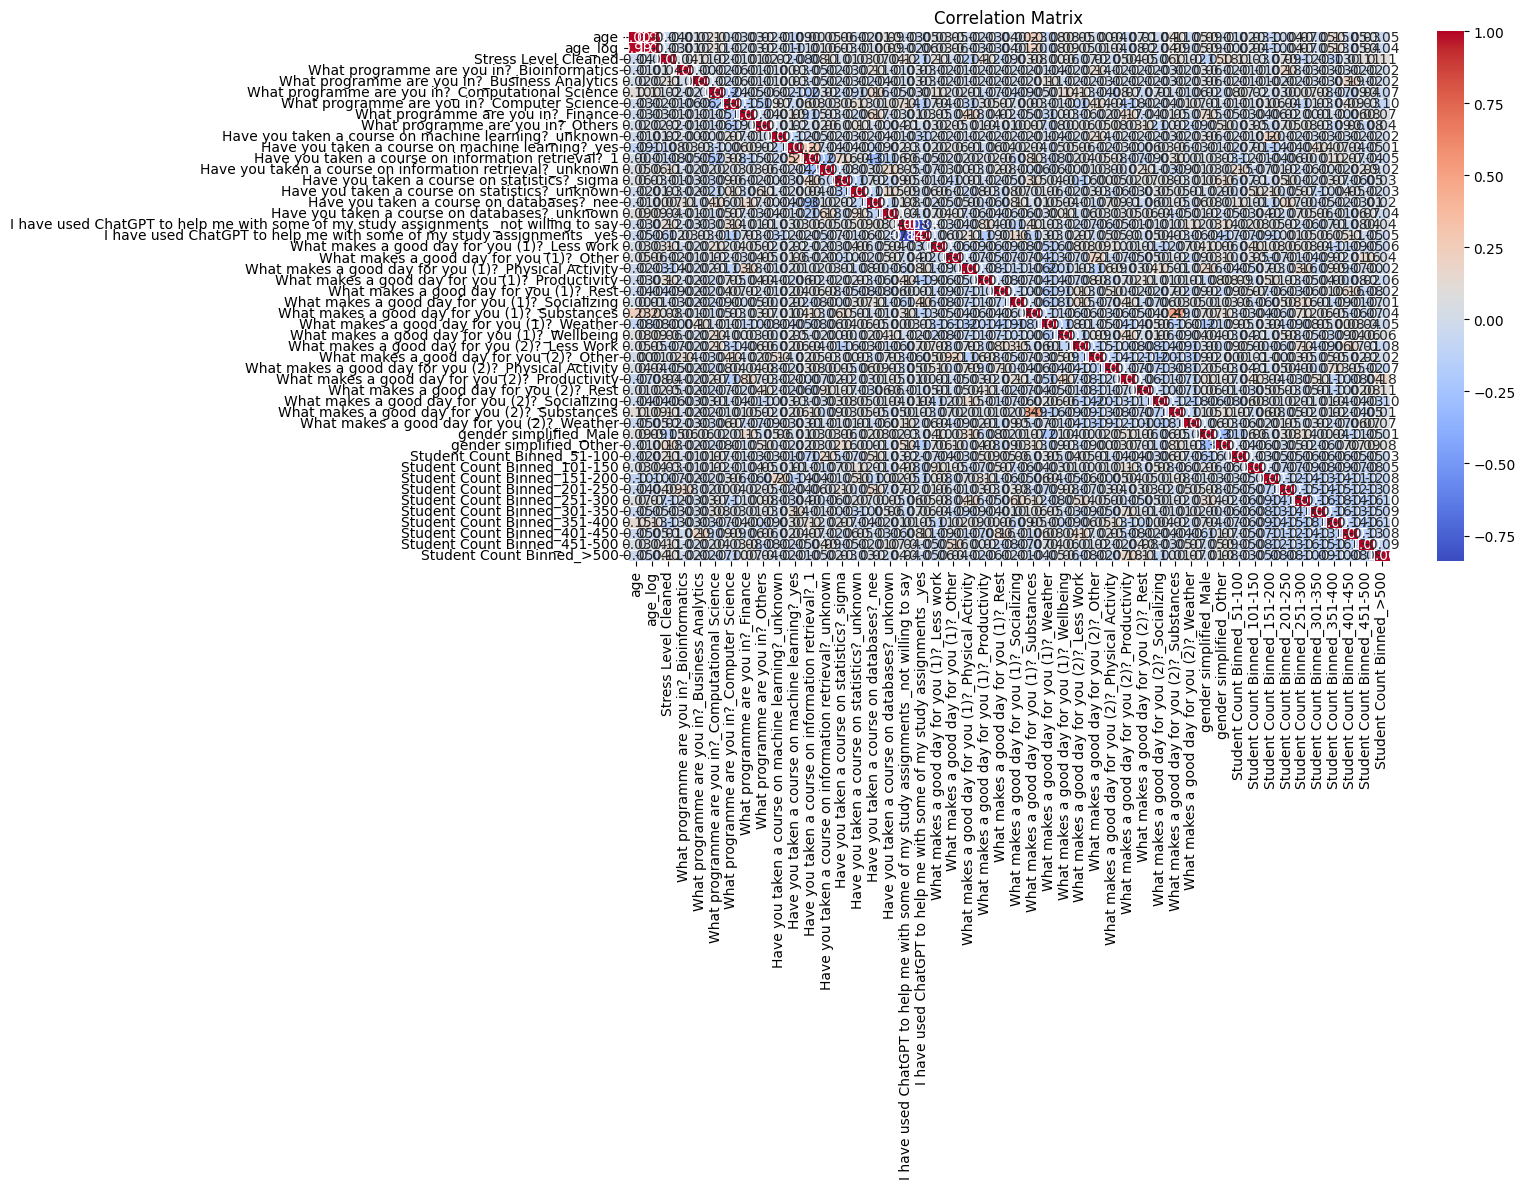

In [621]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Set up the figure size
plt.figure(figsize=(16, 12))

# Generate a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


In [622]:
# Compute correlation of all numeric features with the target
correlation_with_target = df.corr(numeric_only=True)['Stress Level Cleaned'].sort_values(ascending=False)

# Display the correlation
print(correlation_with_target)


Stress Level Cleaned                                                                    1.000000
gender simplified_Other                                                                 0.180487
What makes a good day for you (1)?_Productivity                                         0.118472
I have used ChatGPT to help me with some of my study assignments _not willing to say    0.116404
What makes a good day for you (2)?_Substances                                           0.114960
Student Count Binned_451-500                                                            0.109324
What programme are you in?_Business Analytics                                           0.109311
What makes a good day for you (1)?_Less work                                            0.108731
Student Count Binned_>500                                                               0.108451
Student Count Binned_51-100                                                             0.108222
Have you taken a course on inf

In [623]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# X = all features except the target
X = df.drop(columns=['Stress Level Cleaned'])
y = df['Stress Level Cleaned']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         4
          20       0.00      0.00      0.00         3
          25       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         1
          40       0.33      0.20      0.25         5
          42       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         0
          49       0.00      0.00      0.00         1
          50       0.00      0.00      0.00         3
          55       0.00    

C:\Users\SAKTHE PRIYA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SAKTHE PRIYA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SAKTHE PRIYA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\

In [624]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

X = df.drop(columns=['Stress Level Cleaned'])
y = df['Stress Level Cleaned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))


MAE: 26.023673469387752


Classification

#!pip install scikit-learn


In [ ]:

import scikitlearn as sk



# Naive bayes as a baseline or decision tree



Decision tree is a good starting point as it is explainable, inexpensive
https://scikit-learn.org/stable/modules/tree.html
might also be used as a data exploration?


In [ ]:

from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)


In [ ]:

tree.plot_tree(clf)


Clustering for classification

In [ ]:

https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
)





# classification without cluster feature

#pick the algo



# classification with cluster feature

https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification
https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification



In [ ]:

from sklearn.neighbors import NearestNeighbors
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

nbrs.kneighbors_graph(X).toarray()

#put it into a feature

